In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [22]:
single_image= X_train[0]
single_image.shape

(28, 28)

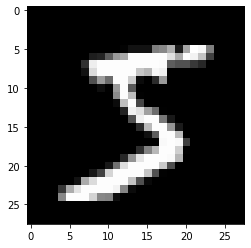

In [23]:
plt.imshow(single_image,cmap='gray')

In [24]:
y_train.shape

(60000,)

In [25]:
X_train.min()
X_train.max()

255

In [26]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [27]:
X_train_scaled.min()
X_train_scaled.max()

1.0

In [28]:
y_train[0]

5

In [29]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [30]:
type(y_train_onehot)

numpy.ndarray

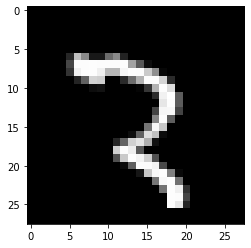

In [31]:
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [32]:
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [33]:
model=Sequential()
model.add(layers.Input(shape=(28,28,1))),
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu')),
model.add(MaxPool2D(pool_size=(2,2))),
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu')),
model.add(MaxPool2D(pool_size=(2,2))),
model.add(layers.Flatten()),
model.add(Dense(8,activation='relu')),
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 8)                 1

In [34]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))   

Epoch 1/5
938/938 [==============================] - 103s 109ms/step - loss: 0.1233 - accuracy: 0.9644 - val_loss: 0.0833 - val_accuracy: 0.9767
Epoch 2/5
938/938 [==============================] - 100s 106ms/step - loss: 0.0694 - accuracy: 0.9801 - val_loss: 0.0583 - val_accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 102s 109ms/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.0446 - val_accuracy: 0.9867
Epoch 4/5
938/938 [==============================] - 99s 106ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 5/5
938/938 [==============================] - 100s 106ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0419 - val_accuracy: 0.9876


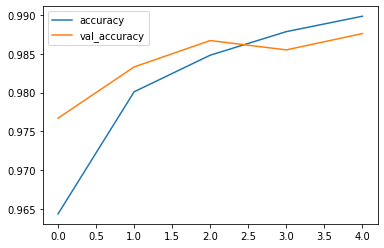

In [38]:
metrics = pd.DataFrame(model.history.history)  
metrics.head()
metrics[['accuracy','val_accuracy']].plot()

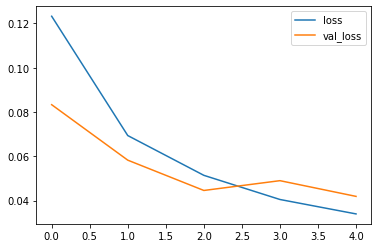

In [39]:
metrics[['loss','val_loss']].plot()

In [45]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

[[ 971    2    3    0    0    0    2    1    1    0]
 [   0 1118    3    6    0    1    3    0    4    0]
 [   1    0 1028    0    0    0    0    2    1    0]
 [   0    0    3  999    0    4    0    2    1    1]
 [   1    0    2    0  968    0    2    1    3    5]
 [   1    1    0    6    0  880    2    1    1    0]
 [   1    1    0    0    1    1  952    0    2    0]
 [   0    2    9    1    2    0    0 1011    1    2]
 [   1    1    2    1    1    2    0    2  962    2]
 [   2    1    1    3    5    4    0    2    4  987]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98   

In [42]:
img = image.load_img('out3.png')
type(img)
img = image.load_img('out3.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

[9]


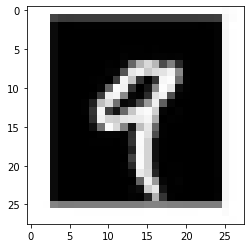

In [44]:
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')